<a href="https://colab.research.google.com/github/ArtemE2009/Jocker/blob/main/Efremtsev_hw1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [198]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler #масштабирование
from sklearn.preprocessing import PolynomialFeatures #полиномиальная регрессия
import matplotlib.pyplot as plt

In [199]:
df = pd.read_csv('train.csv')

In [200]:
df.head()

,id,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,0,2.3859,15.0,3.827160,1.112100,1280.0,2.486989,34.60,-120.12,0.980
1,1,3.7188,17.0,6.013373,1.054217,1504.0,3.813084,38.69,-121.22,0.946
2,2,4.7750,27.0,6.535604,1.103175,1061.0,2.464602,34.71,-120.45,1.576
3,3,2.4138,16.0,3.350203,0.965432,1255.0,2.089286,32.66,-117.09,1.336
4,4,3.7500,52.0,4.284404,1.069246,1793.0,1.604790,37.80,-122.41,4.500


In [201]:
from matplotlib import cm #чтобы учитывать третью переменную с помощью оттенков цветов

x1 = df["MedInc"]
y1 = df["MedHouseVal"]
z1 = df["Latitude"]

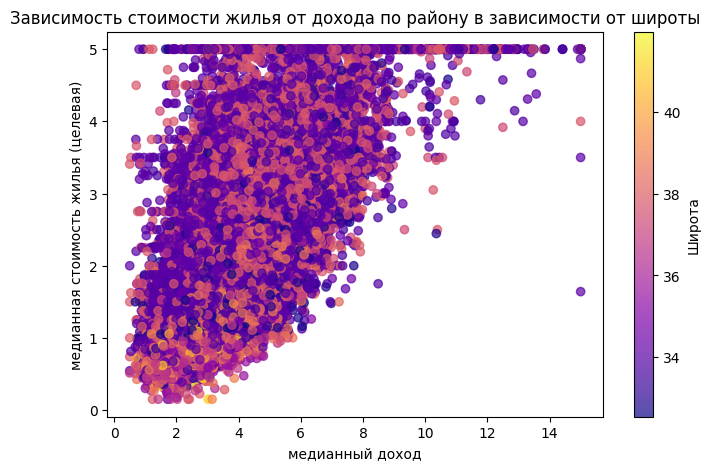

In [202]:
plt.figure(figsize=(8,5))
sc = plt.scatter(x1, y1, c = z1, cmap='plasma', alpha=0.7)
plt.colorbar(sc, label='Широта')
plt.xlabel('медианный доход')
plt.ylabel('медианная стоимость жилья (целевая)')
plt.title('Зависимость стоимости жилья от дохода по району в зависимости от широты')
plt.show()


In [203]:
import seaborn as sns

x2 = df['MedHouseVal']

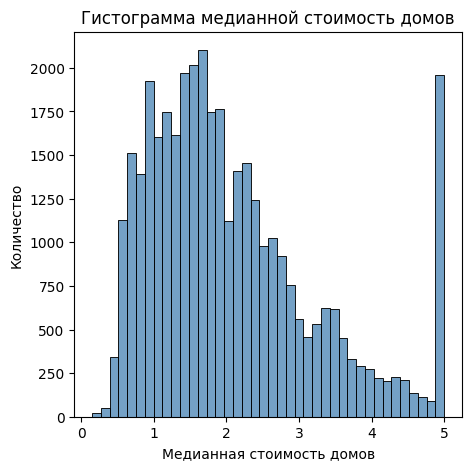

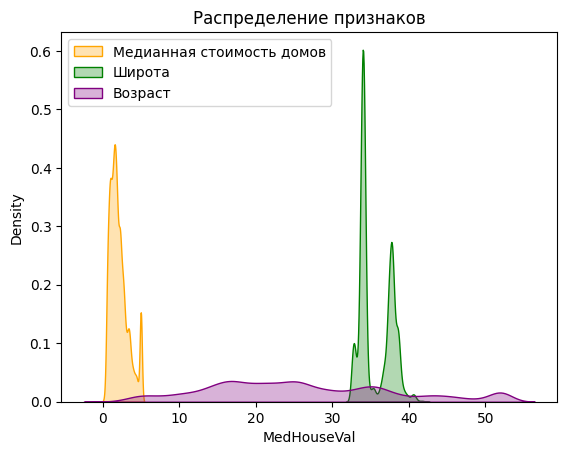

In [204]:
# Гистограмма
plt.figure(figsize=(5,5))
sns.histplot(df['MedHouseVal'], bins=40, color='steelblue')
plt.xlabel('Медианная стоимость домов')
plt.ylabel('Количество')
plt.title('Гистограмма медианной стоимость домов')
plt.show()

# Три KDE на одном полотне (можно и раздельно)
for col, clr in zip(['MedHouseVal','Latitude','HouseAge'],
                    ['orange','green','purple']):
    sns.kdeplot(df[col], label=col, fill=True, alpha=0.3, color=clr)
plt.legend(['Медианная стоимость домов','Широта','Возраст']); plt.title('Распределение признаков')
plt.show()


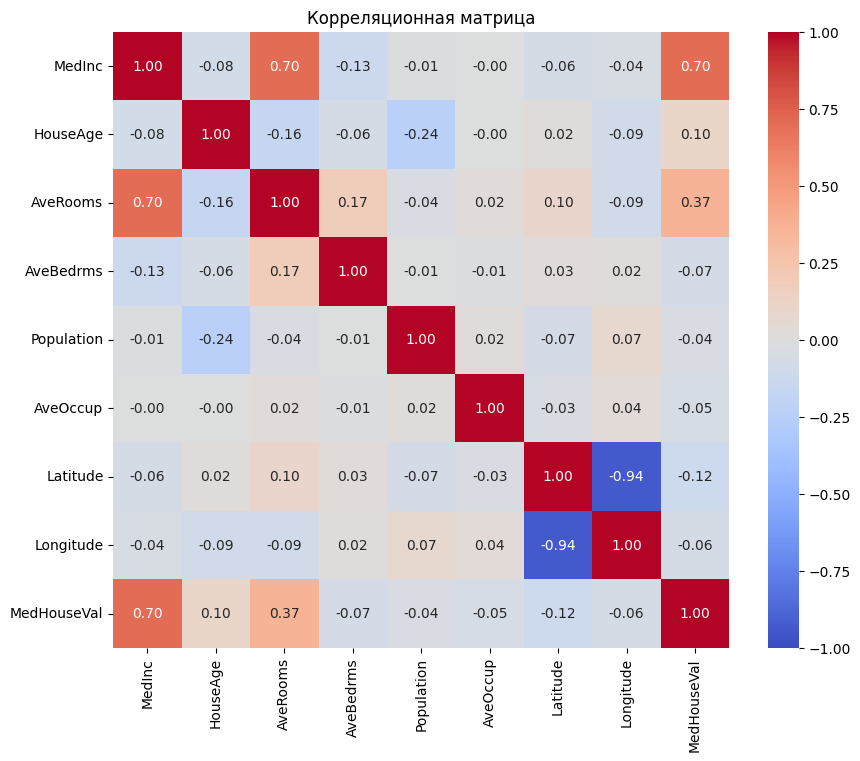

In [205]:
plt.figure(figsize=(10,8))
corr = df.drop(columns=['id']).corr()
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm',
            vmin=-1, vmax=1, square=True)
plt.title('Корреляционная матрица')
plt.show()


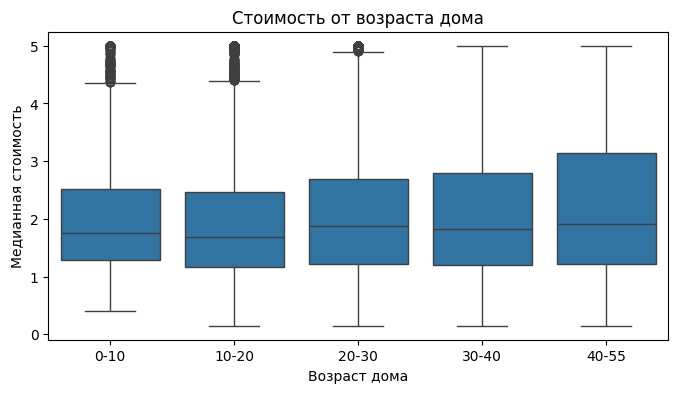

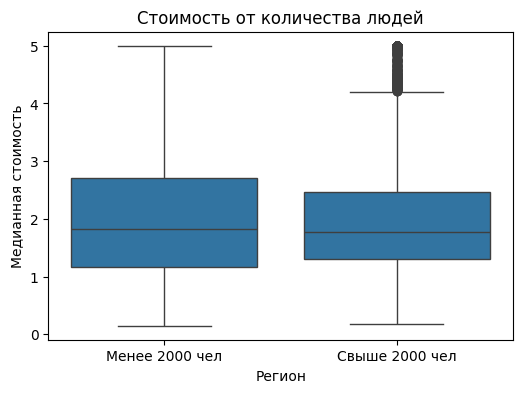

In [206]:
df['Age_bin'] = pd.cut(df['HouseAge'],
                       bins=[0,10,20,30,40,55],
                       labels=['0-10','10-20','20-30','30-40','40-55'])

plt.figure(figsize=(8,4))
sns.boxplot(x='Age_bin', y='MedHouseVal', data=df)
plt.xlabel('Возраст дома')
plt.ylabel('Медианная стоимость')
plt.title('Стоимость от возраста дома')
plt.show()

df['Population1'] = (df['Population'] < 2000).map({True:'Менее 2000 чел', False:'Свыше 2000 чел'})
plt.figure(figsize=(6,4))
sns.boxplot(x=df['Population1'], y=df['MedHouseVal'], data=df)
plt.xlabel('Регион')
plt.ylabel('Медианная стоимость')
plt.title('Стоимость от количества людей')
plt.show()


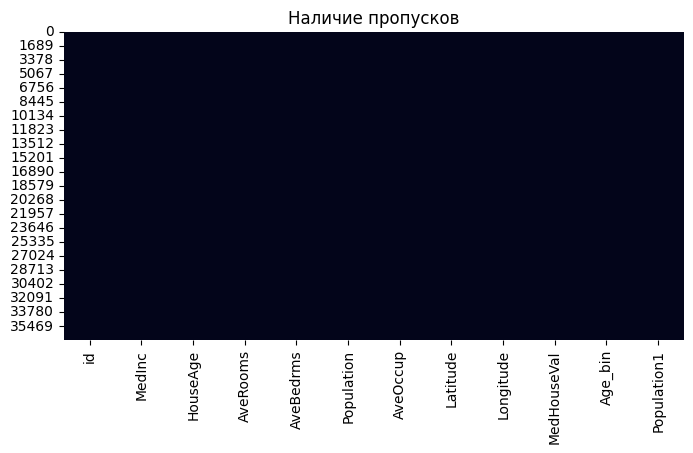

In [207]:
plt.figure(figsize=(8,4))
sns.heatmap(df.isna(), cbar=False)
plt.title('Наличие пропусков')
plt.show()

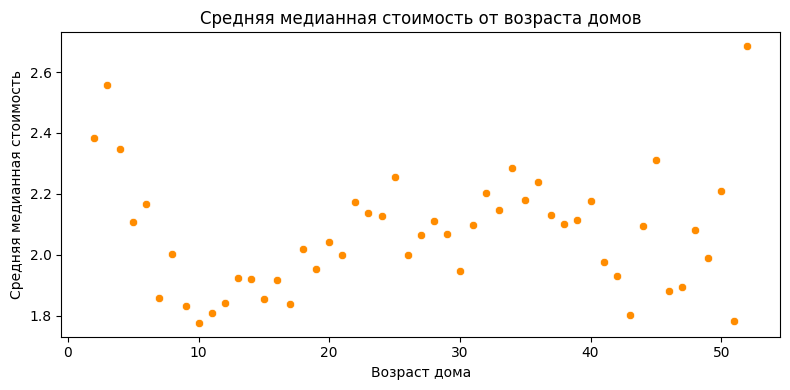

In [208]:
age_mean = (df
            .groupby('HouseAge')['MedHouseVal']
            .mean()
            .reset_index())

plt.figure(figsize=(8,4))
sns.scatterplot(data=age_mean, x='HouseAge', y='MedHouseVal',
             marker='o', color='darkorange')
plt.xlabel('Возраст дома')
plt.ylabel('Средняя медианная стоимость')
plt.title('Средняя медианная стоимость от возраста домов')
plt.tight_layout()
plt.show()


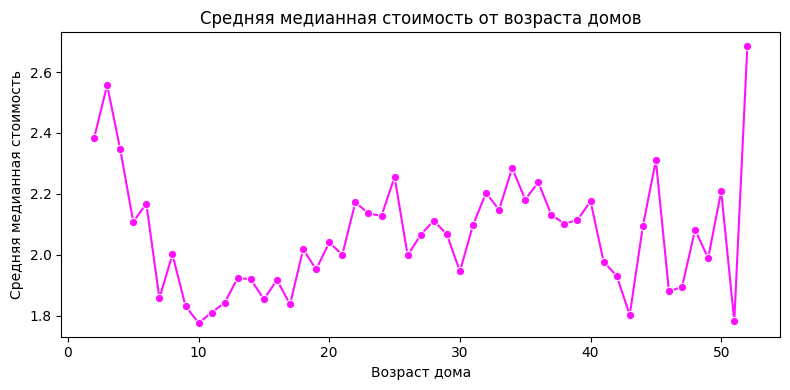

In [209]:
age_mean = (df
            .groupby('HouseAge')['MedHouseVal']
            .mean()
            .reset_index())

plt.figure(figsize=(8,4))
sns.lineplot(data=age_mean, x='HouseAge', y='MedHouseVal',
             marker='o', color='#FF11FF')
plt.xlabel('Возраст дома')
plt.ylabel('Средняя медианная стоимость')
plt.title('Средняя медианная стоимость от возраста домов')
plt.tight_layout()
plt.show()

In [210]:
X = df[['MedInc','HouseAge','AveRooms','AveBedrms', 'Population','AveOccup','Latitude','Longitude']]
y = df['MedHouseVal']

In [211]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [212]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [213]:
model = {
    "LinearRegression": LinearRegression(),
    "Ridge": Ridge(alpha=1.0), #1.0
    "Lasso": Lasso(alpha=0.001, max_iter=5000) ##0.001
}

In [214]:
results = {}

for name, model in model.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[name] = (mae, r2, y_pred)

    print(f"{name}:")
    print(f"MAE: {mae:.2f}")
    print(f"R2: {r2:.3f}")
    print("-"*50)

LinearRegression:
MAE: 0.54
R2: 0.588
--------------------------------------------------
Ridge:
MAE: 0.54
R2: 0.588
--------------------------------------------------
Lasso:
MAE: 0.54
R2: 0.588
--------------------------------------------------


In [215]:
degree = 2
poly = PolynomialFeatures(degree=degree)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

In [216]:
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)
y_pred_poly = poly_model.predict(X_test_poly)

In [217]:
mae_poly = mean_absolute_error(y_test, y_pred_poly)
r2_poly = r2_score(y_test, y_pred_poly)
print(f"Polynomial Regression (degree={degree}):")
print(f"MAE: {mae_poly:.2f}")
print(f"R2: {r2_poly:.3f}")
print("-"*50)

Polynomial Regression (degree=2):
MAE: 0.49
R2: 0.646
--------------------------------------------------
